In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Распределение извл.запасов по категориям

In [113]:
data = [('БС6','AB1',24),('БС6','B2',0),
        ('БС8','AB1',14),('БС8','B2',0),
        ('БС10','AB1',4),('БС10','B2',0),
        ('Ач1','AB1',2),('Ач1','B2',4),
        ('ЮС0','AB1',0),('ЮС0','B2',0),
        ('ЮС2','AB1',8),('ЮС2','B2',4)]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in long_scalars


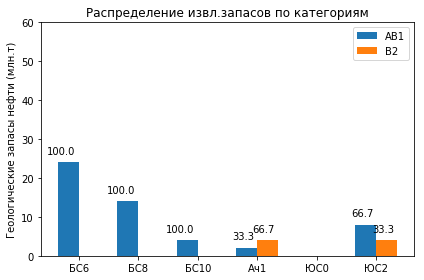

In [117]:
data = np.array(data)
fig,ax = plt.subplots()
width = 0.35
gr1 = data[data[:,1]=='AB1', 2].astype(int)
gr2 = data[data[:,1]=='B2', 2].astype(int)
ind = np.arange(len(gr1))

rects1 = ax.bar(ind - width/2, gr1, width, bottom=0, label="AB1")
rects2 = ax.bar(ind + width/2, gr2, width, bottom=0, label="B2")
ax.set_ylabel('Геологические запасы нефти (млн.т)')
ax.set_title('Распределение извл.запасов по категориям')
ax.set_xticks(ind)
ax.set_xticklabels(data[data[:,1]=='B2',0])
ax.set_ylim(0,60)
ax.legend()

def autolabel(rects,cat,xpos='center'):
    
    ha = {'center':'center','right':'left','left':'right'}
    offset = {'center':0,'right':1,'left':-1}

    for i,rect in enumerate(rects):
        height1 = rects1[i].get_height()
        height2 = rects2[i].get_height()
        if(cat==0):
            goal = height1
        else:
            goal = height2    
        perc = np.round(goal / (height1+height2) *100,1)
        if(perc>0):
            ax.annotate('{}'.format(perc),xy=(rect.get_x()+rect.get_width(), goal+0.9),
                        xytext=(offset[xpos]*3,3),textcoords="offset points", ha=ha[xpos],va='bottom')

autolabel(rects1,0,'left')
autolabel(rects2,1,'left')

fig.tight_layout()
plt.show()

## Распределение извлекаемых запасов по пластам

In [78]:
data = [('БС6', 24.4),
        ('БС8', 14.0),
        ('БС10', 4.2),
        ('Ач1', 5.6),
        ('ЮС0', 0.2),
        ('ЮС2', 11.0)]
data = np.array(data)

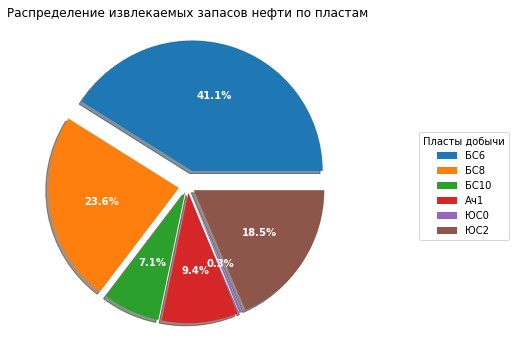

In [93]:
labels = data[:,0]
counts = data[:,1].astype(float)

def get_perc(pct):
    return '{:.1f}%'.format(pct)

explode = list(map(lambda x: max(0.05,x*0.005),counts))
fig,ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(counts,labels=labels, explode = explode, shadow=True,
                                  autopct=lambda pct: get_perc(pct),textprops=dict(color="w"))
ax.legend(wedges,labels,title="Пласты добычи", loc='center right',bbox_to_anchor=(1,0,0.5,1))

plt.setp(autotexts,size=10,weight='bold')
ax.set_title('Распределение извлекаемых запасов нефти по пластам')
plt.show()

## Распределение пробуренного фонда скважин по характеру работы и состоянию на 01.01.2016 г.

### Добывающий фонд

In [3]:
data_dob = [('Действующие', 134),
        ('В консервации', 113),
        ('Ликвидированные', 118),
        ('Бездействующие', 12),
        ('В ож.ликвидации', 4)]
data_dob = np.array(data_dob)

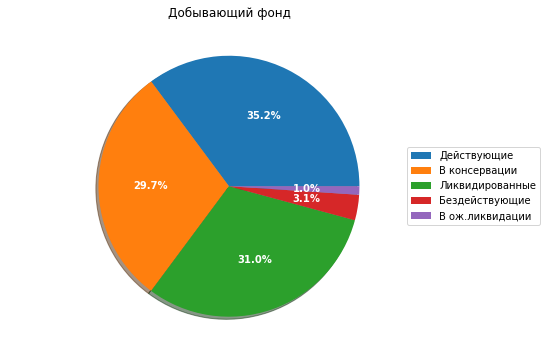

In [13]:
labels = data_dob[:,0]
counts = data_dob[:,1].astype(float)

def get_perc(pct):
    return '{:.1f}%'.format(pct)

#explode = list(map(lambda x: max(0.05,x*0.005),counts))
fig,ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(counts,labels=labels, explode = None, shadow=True,
                                  autopct=lambda pct: get_perc(pct),textprops=dict(color="w"))
ax.legend(labels, loc='center',bbox_to_anchor=(1,0,0.5,1))

plt.setp(autotexts,size=10,weight='bold')
ax.set_title('Добывающий фонд')
plt.show()

### Нагнетательный фонд

In [104]:
data_nag = [('Действующие', 88),
            ('В освоении', 1),
            ('В ож.ликвидации', 3),
            ('Бездействующие', 2),
            ('В консервации', 10),
            ('Ликвидированные', 17)]
data_nag = np.array(data_nag)

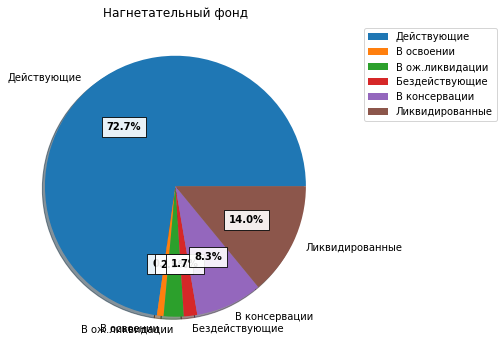

In [110]:
labels = data_nag[:,0]
counts = data_nag[:,1].astype(float)

def get_perc(pct):
    return '{:.1f}%'.format(pct)
explode = list(map(lambda x: max(0.1,x*0.001),counts))
#explode = list(map(lambda x:  if(x*0.01 < 0.02) else x*0.001 ,counts))
#explode = [0.1,0.1,0.4,0.4,0.1,0.1]
fig,ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(counts,labels=labels, explode = None, shadow=True,
                                  autopct='%1.1f%%',textprops=dict(color="black"))
ax.legend(labels, loc='best',bbox_to_anchor=(1,0,0.5,1))

plt.setp(autotexts,size=10,weight='bold', bbox={'facecolor':'white','alpha':0.9,'pad':5,'lw':0.92})
ax.set_title('Нагнетательный фонд')
plt.show()

## Распределение добывающего и нагнетательного фонда скважин по пластам

In [120]:
data = [('БС6','Нефтяной фонд',200),('БС6','Нагнетательный фонд',70),('БС6','Специализированный фонд',10),
        ('БС8','Нефтяной фонд',130),('БС8','Нагнетательный фонд',44),('БС8','Специализированный фонд',10),
        ('БС10','Нефтяной фонд',28),('БС10','Нагнетательный фонд',10),('БС10','Специализированный фонд',5),
        ('Ач1','Нефтяной фонд',15),('БС10','Нагнетательный фонд',0),('БС10','Специализированный фонд',0),
        ('ЮС2','Нефтяной фонд',20),('ЮС2','Нагнетательный фонд',0),('ЮС2','Специализированный фонд',0)]

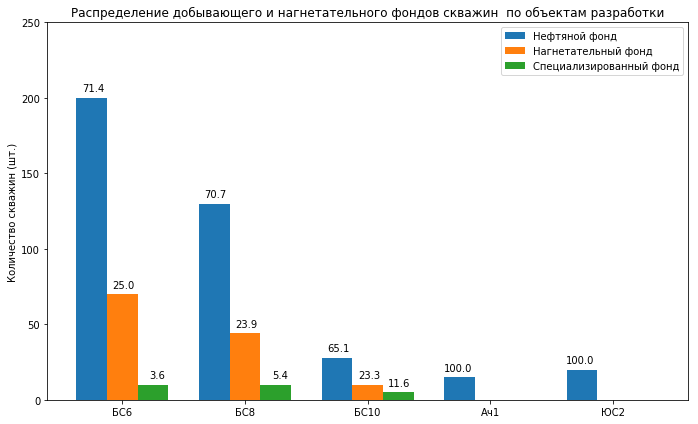

In [138]:
data = np.array(data)
fig,ax = plt.subplots(figsize=(10,6))
width = 0.25
gr1 = data[data[:,1]=='Нефтяной фонд', 2].astype(int)
gr2 = data[data[:,1]=='Нагнетательный фонд', 2].astype(int)
gr3 = data[data[:,1]=='Специализированный фонд', 2].astype(int)
ind = np.arange(len(gr1))

rects1 = ax.bar(ind-width, gr1, width, bottom=0, label="Нефтяной фонд")
rects2 = ax.bar(ind, gr2, width, bottom=0, label="Нагнетательный фонд")
rects3 = ax.bar(ind + width, gr3, width, bottom=0, label="Специализированный фонд")
ax.set_ylabel('Количество скважин (шт.)')
ax.set_title('Распределение добывающего и нагнетательного фондов скважин  по объектам разработки')
ax.set_xticks(ind)
ax.set_xticklabels(data[data[:,1]=='Нефтяной фонд',0])
ax.set_ylim(0,250)
ax.legend()

def autolabel(rects,cat,xpos='center'):
    
    ha = {'center':'center','right':'left','left':'right'}
    offset = {'center':0,'right':1,'left':-1}
    r_sum = 0
    for i,rect in enumerate(rects):
        for rect in rects:
            r_sum += rect.get_height()
        height1 = rects[i].get_height()
        height2 = rects[i+1].get_height()
        height3 = rects3[i].get_height()
        if(cat==0):
            goal = height1
        elif(cat==1):
            goal = height2 
        else:
            goal = height3
        perc = np.round(goal / (height1+height2+height3) *100,1)
        if(perc>0):
            ax.annotate('{}'.format(perc),xy=(rect.get_x()+rect.get_width(), goal+0.9),
                        xytext=(offset[xpos]*3,3),textcoords="offset points", ha=ha[xpos],va='bottom')

autolabel(rects1,0,'left')
autolabel(rects2,1,'left')
autolabel(rects3,2,'left')

fig.tight_layout()
plt.show()